# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started! 

Import the file `'turnstile_180901.txt'`. 

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [3]:
df.columns = df.columns.str.lower()

Change the index to `'linename'`: 

In [4]:
df.set_index('linename', inplace = True)


Reset the index: 

In [5]:
# Reset the index - done above via inplace parameter
df.index

Index(['NQR456W', 'NQR456W', 'NQR456W', 'NQR456W', 'NQR456W', 'NQR456W',
       'NQR456W', 'NQR456W', 'NQR456W', 'NQR456W',
       ...
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'],
      dtype='object', name='linename', length=197625)

Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [6]:
df['num_lines']  = df.index.str.len()

Write a function to clean column names: 

In [7]:
def clean(col_name):
    cleaned = col_name.strip()
    return cleaned

In [8]:
df.columns = [clean(col) for col in df.columns]


In [29]:
# Check to ensure the column names were cleaned
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'division', 'date', 'time', 'desc',
       'entries', 'exits', 'num_lines', 'days_of_week', 'day_of_week'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [36]:
print(df['date'].dtype)
df['date'] = pd.to_datetime(df['date'])
df['days_of_week'] = df['date'].dt.day_name()
df.columns

datetime64[ns]


Index(['c/a', 'unit', 'scp', 'station', 'division', 'date', 'time', 'desc',
       'entries', 'exits', 'num_lines', 'days_of_week', 'day_of_week'],
      dtype='object')

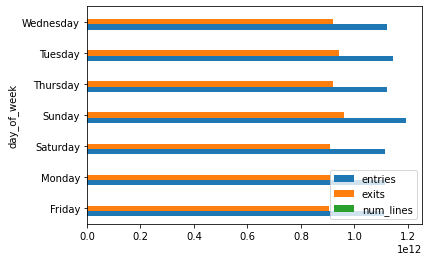

In [37]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum()
grouped.plot(kind='barh')
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [38]:
grouped = grouped.reset_index()
grouped.head()



,day_of_week,entries,exits,num_lines
0,Friday,1110224700078,906799065337,75573
1,Monday,1114237052454,911938153513,76110
2,Saturday,1115661545514,909142081474,74725
3,Sunday,1192306179082,959223750461,75306
4,Thursday,1122723988662,920691927110,76607


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [41]:
# Use this dictionary to create a new column 
weekend_map = {0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)

IndexError: index 0 is out of bounds for axis 0 with size 0

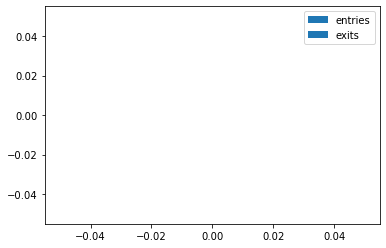

In [45]:
wkend = grouped.groupby('is_weekend').sum()
wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

Remove the `'c/a'` and `'scp'` columns. 

In [53]:
df= df.drop('c/a',axis=1)
df = df.drop('scp', axis=1)

df.head(2)

,unit,station,division,date,time,desc,entries,exits,num_lines,days_of_week,day_of_week
linename,,,,,,,,,,,
NQR456W,R051,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday,Saturday
NQR456W,R051,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday,Saturday


## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

*Plotting by weekend/weekday doesn't yield much insight - it glosses over date/station. Weekend/weekday traffic could be a more in depth way to look at those individual subsets but applying this filter to the data as a whole doesn't make sense.*

## Summary

Great! You practiced your data cleanup skills using Pandas.